# Analyzing Video with OpenCV and NumPy

## Task 1: Import libraries

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

VFILE = "video/car.MOV"

## Task 1: Define generator for reading video

In [24]:
def get_frames(filename):
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            yield frame
        else:
            break
    video.release()
    yield None

## Task 2: Retrieve and display video frames

In [25]:
for f in get_frames(VFILE):
    if f is None:
        break
    cv2.imshow('frame', f)
    # Hit Escape to stop
    if cv2.waitKey(10) == 27:
        break
    
cv2.destroyAllWindows()

In [18]:
def get_frame(filename, index):
    counter = 0
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            if counter == index:
                return frame
            counter += 1
        else:
            break
    video.release()
    return None

shape  (1080, 1920, 3)
pixel at (0,0)  [0 0 0]


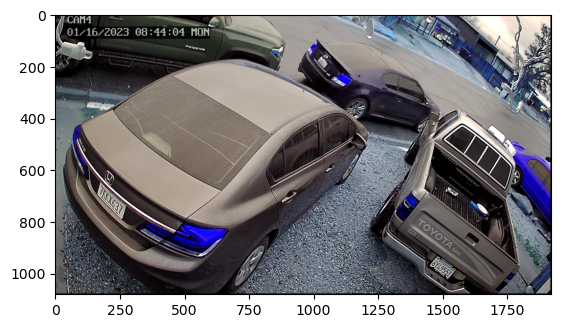

In [26]:
frame = get_frame(VFILE, 25)
print('shape ', frame.shape)

# Examine pixel at 0,0
print('pixel at (0,0) ', frame[0,0,:])

plt.imshow(frame)

In [27]:
plt.imshow([100:450, 1100:1300])

SyntaxError: invalid syntax (1082252875.py, line 1)

pixel at (0,0)  [0 0 0]


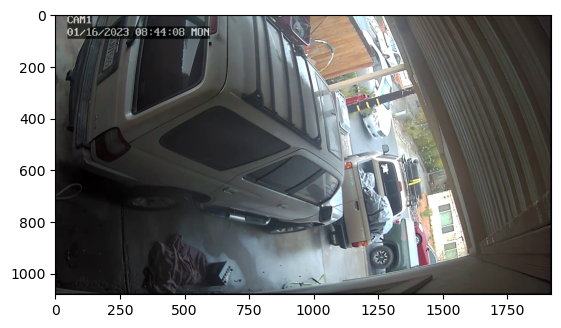

In [75]:
fix_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Examine pixel at 0,0
print('pixel at (0,0) ', fix_frame[0,0,:])
plt.imshow(fix_frame)

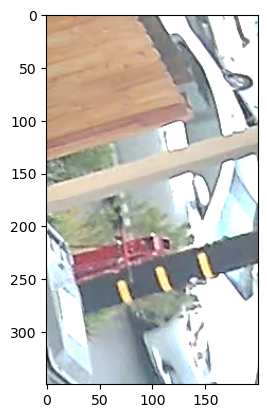

In [76]:
plt.imshow(fix_frame[100:450, 1100:1300])

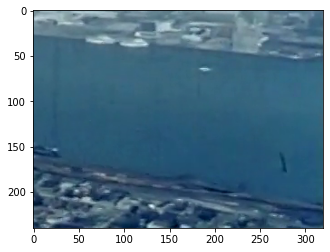

In [8]:
plt.imshow(fix_frame[240:, 320:])

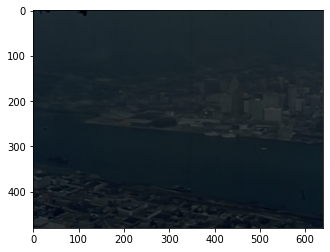

In [9]:
darker = 0.3 * fix_frame
darker = darker.astype(np.uint8)
plt.imshow(darker)

(480, 640)


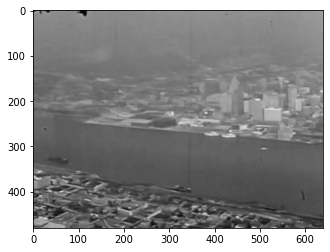

In [10]:
R = fix_frame[:,:,0]
G = fix_frame[:,:,1]
B = fix_frame[:,:,2]
grey = 0.299*R + 0.587*G + 0.114*B
print(grey.shape)
plt.imshow(grey, cmap='gray')

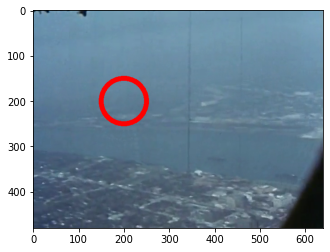

In [11]:
# Draw thick circle
frame = get_frame(VFILE, 200)
cv2.circle(frame, 
           center=(200,200), 
           radius=50, 
           color=(0,0,255),
           thickness=10)

fixed_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(fixed_frame)

In [22]:
# Process all video frames
counter = 0
for frame in get_frames(VFILE):
    if frame is None:
        break
    # Add counter
    cv2.putText(frame, 
                text=str(counter), 
                org=(100,100), 
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                fontScale=1, 
                color=(0,255,0),
                thickness=3)
    cv2.imshow('frame', frame)
    
    # Hit Escape to stop
    if cv2.waitKey(10) == 27:
        break
    counter += 1
    
cv2.destroyAllWindows()

In [58]:
# FourCC is a 4-byte code used to specify the video codec.
fourcc = cv2.VideoWriter_fourcc('M', 'P', '4', 'V')
video_out = cv2.VideoWriter("new.mp4", fourcc, 20, (640,480))

# Process all video frames
counter = 0
for frame in get_frames(VFILE):
    if frame is None:
        break
    # Add counter
    cv2.putText(frame, 
                text=str(counter), 
                org=(100,100), 
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                fontScale=1, 
                color=(0,255,0),
                thickness=3)
#    cv2.imshow('frame', frame)
    
    # Hit Escape to stop
#    if cv2.waitKey(10) == 27:
#        break
    video_out.write(frame)
    counter += 1
video_out.release()

In [21]:
# Get number of frames (requires codec support)
video = cv2.VideoCapture(VFILE)
frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video.release()
print('frame count ', frame_count)

frame count  192


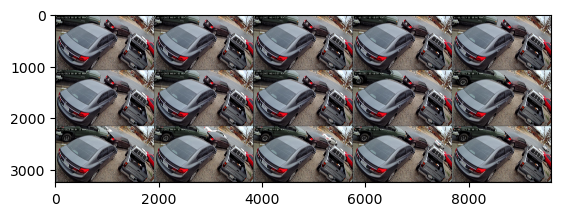

In [22]:
COLLAGE_ROWS = 3
COLLAGE_COLS = 5

collage_num_images = COLLAGE_ROWS * COLLAGE_COLS
skip_frames = frame_count // collage_num_images

frames = []
counter = 0
for f in get_frames(VFILE):
    if counter % skip_frames == 0:
        frames.append(f)
    counter += 1
    
row1 = np.concatenate( frames[0:5], axis=1)
row2 = np.concatenate( frames[5:10], axis=1)
row3 = np.concatenate( frames[10:15], axis=1)
collage = np.concatenate( (row1, row2, row3), axis=0) 
collage = cv2.cvtColor(collage, cv2.COLOR_BGR2RGB)
plt.imshow(collage) 